# Exercise Sheet Set 5 Ulzii-Utas.N

# Exercise 1-6

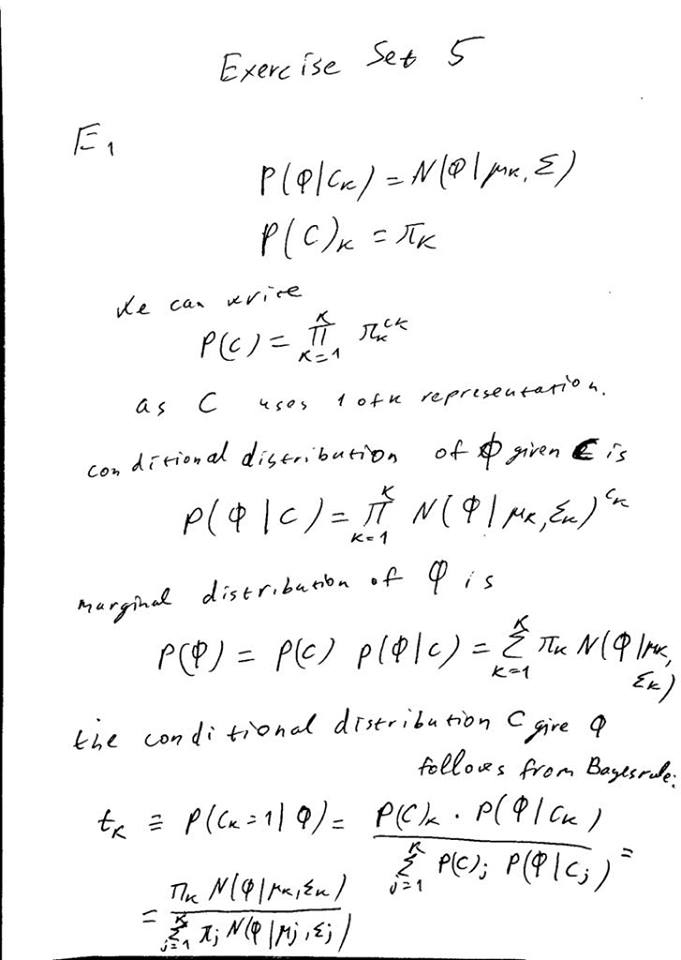

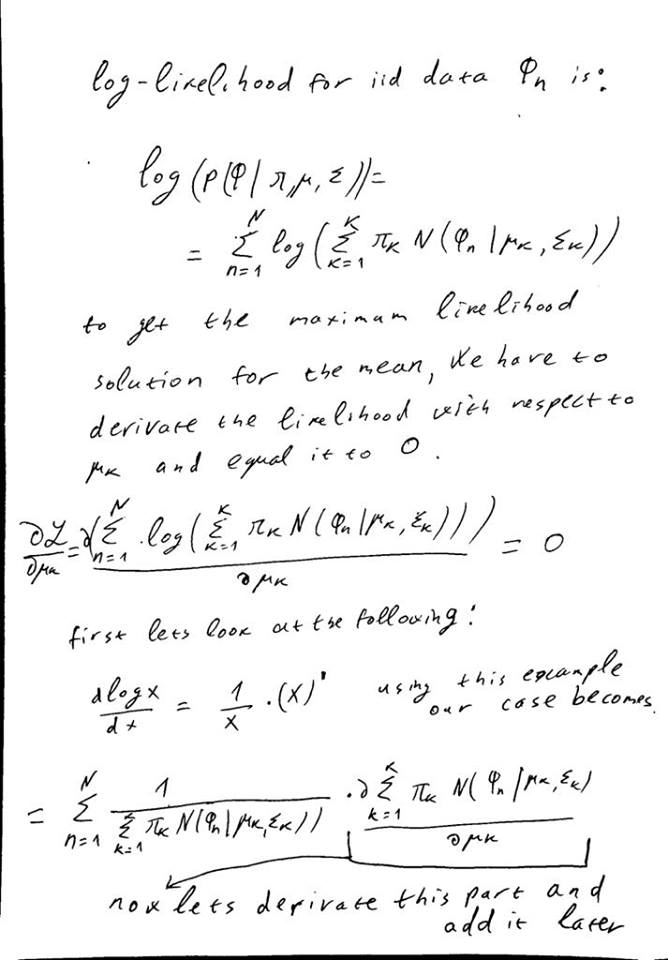

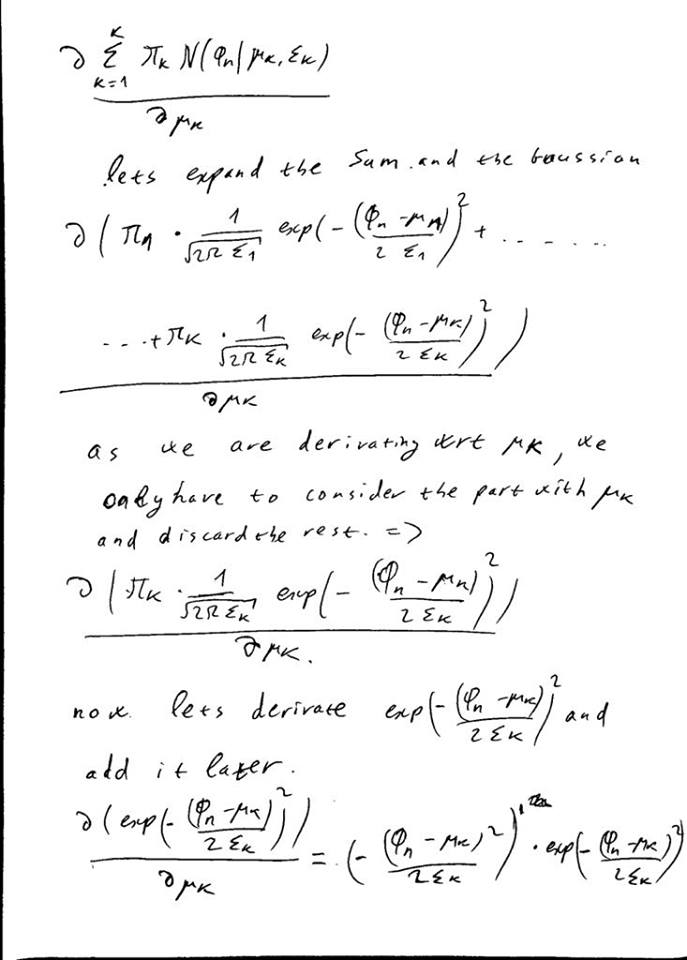

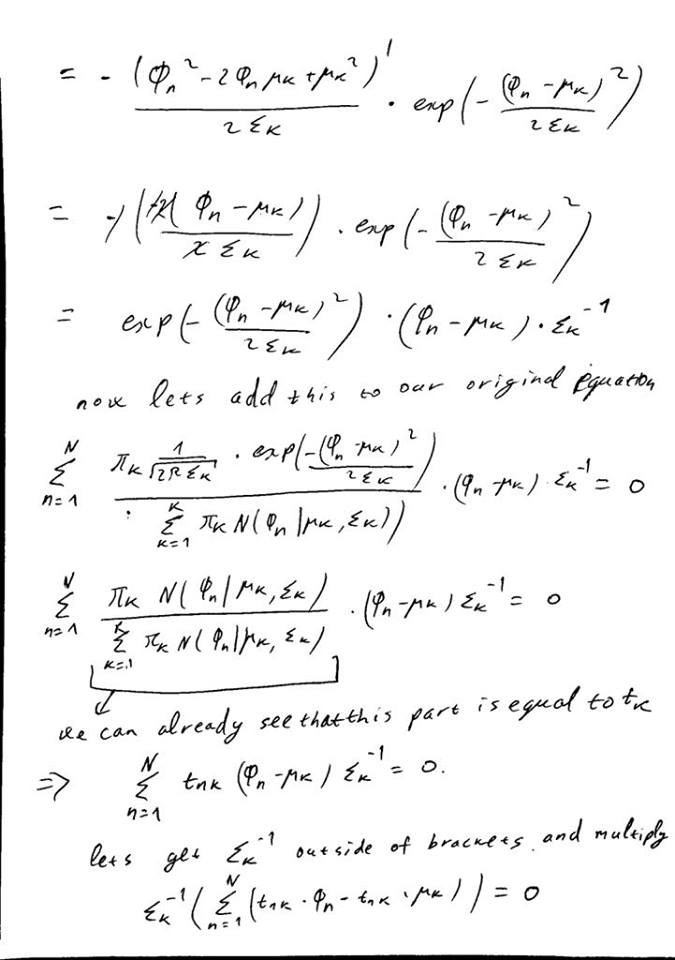

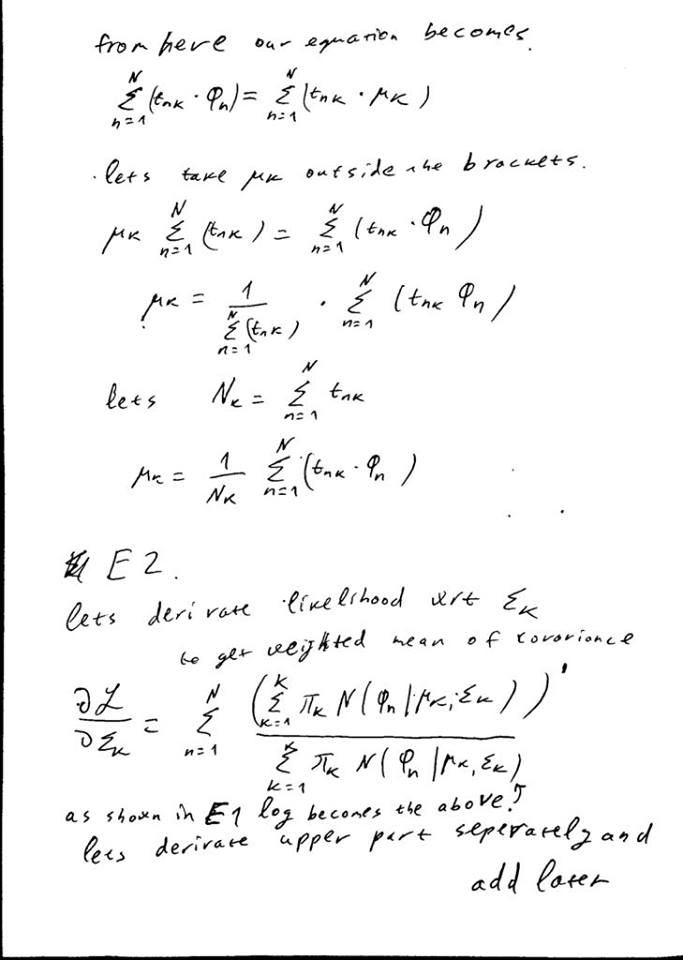

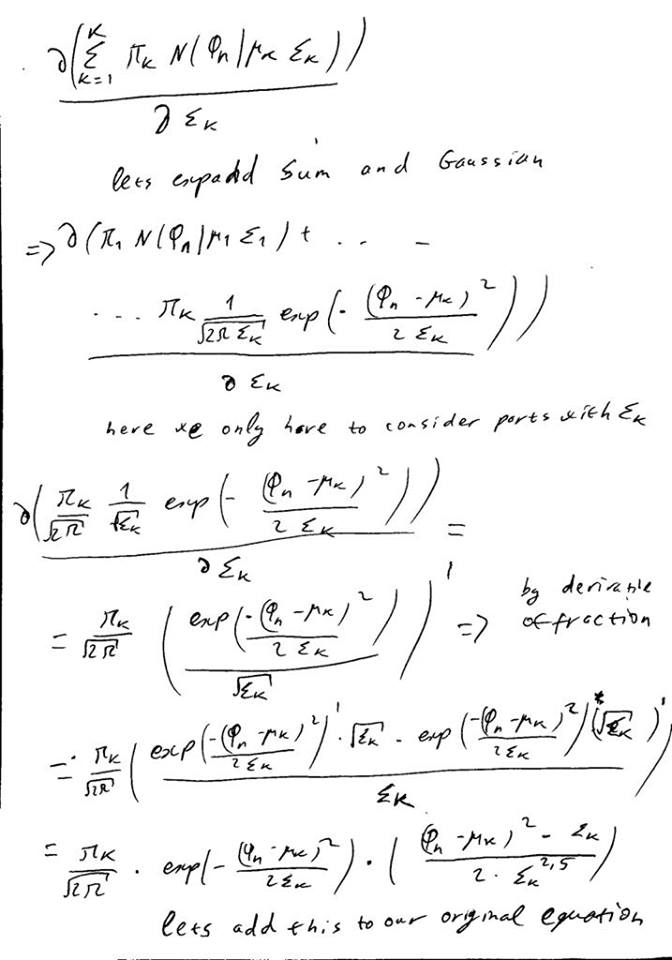

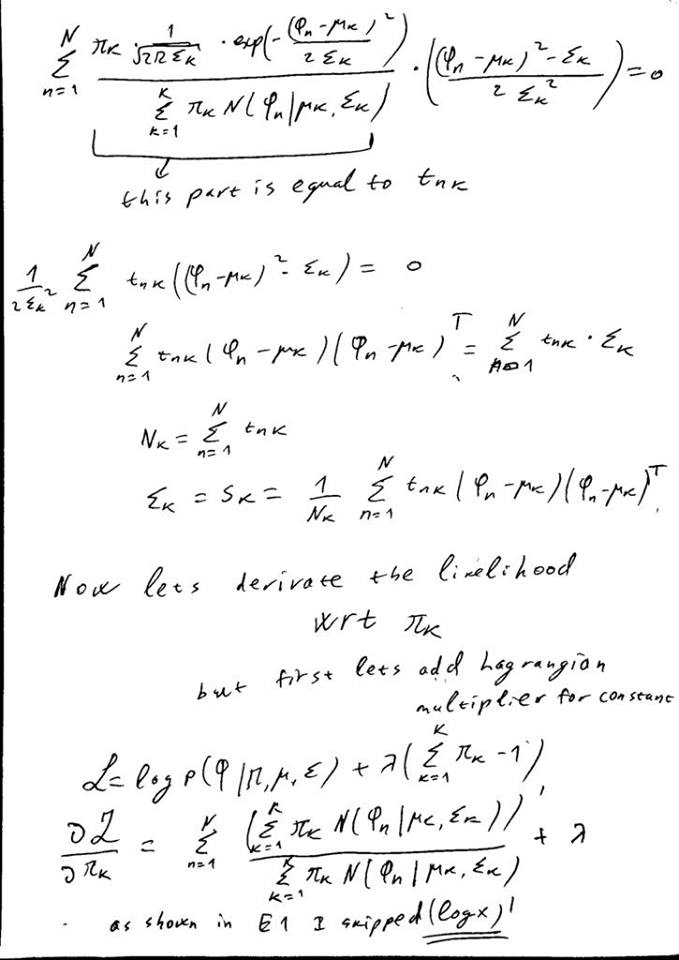

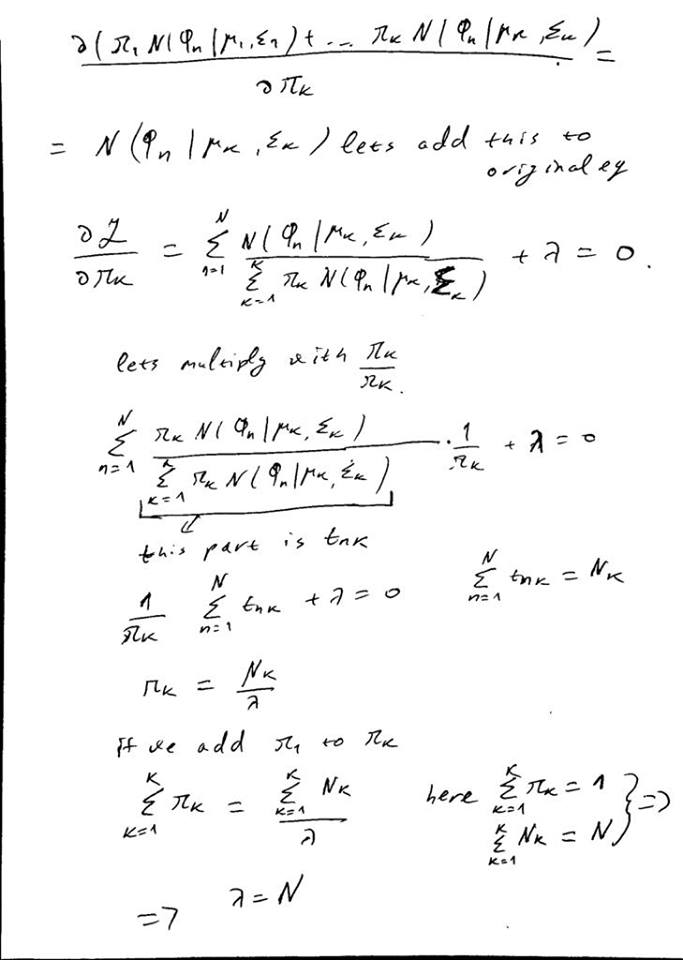

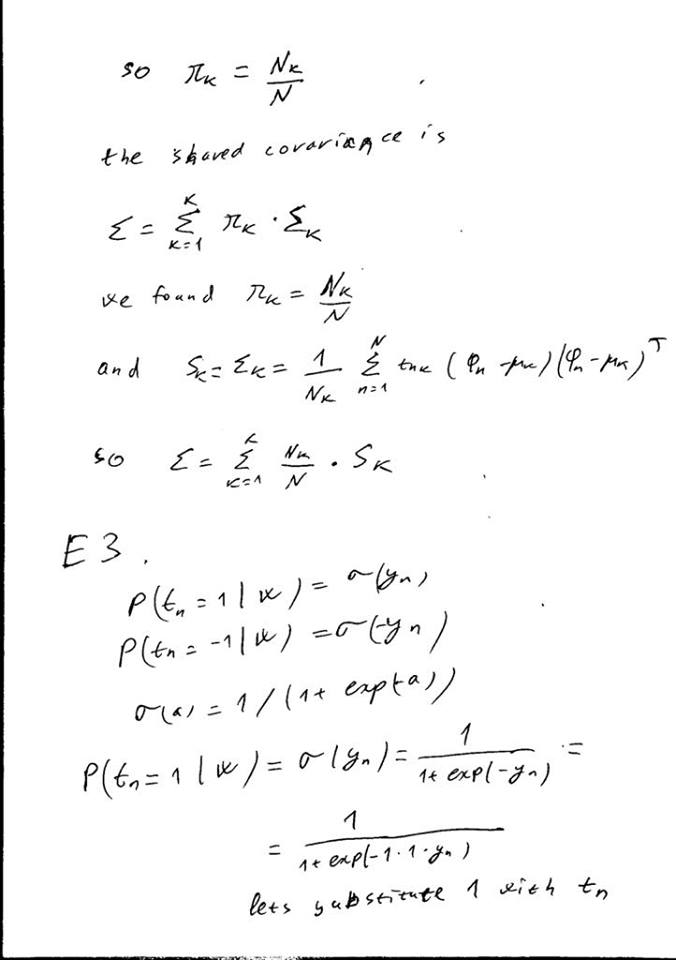

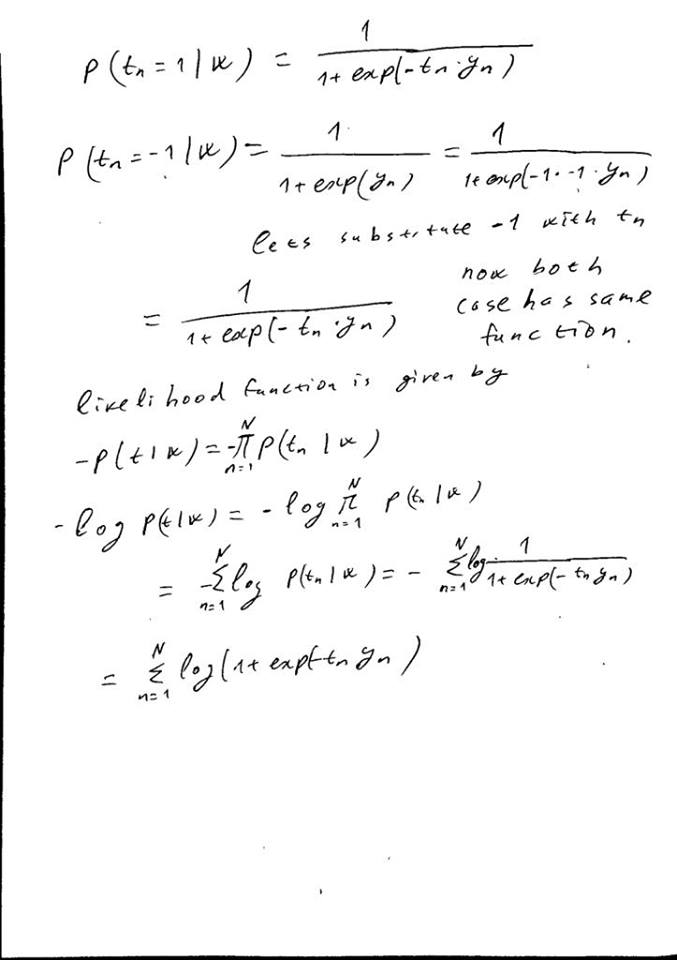

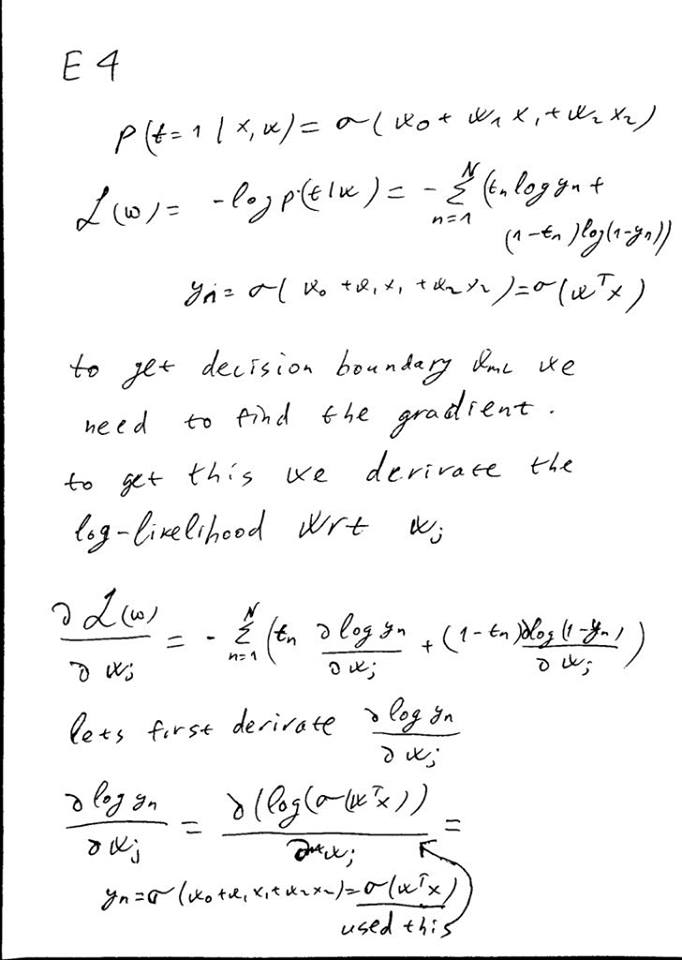

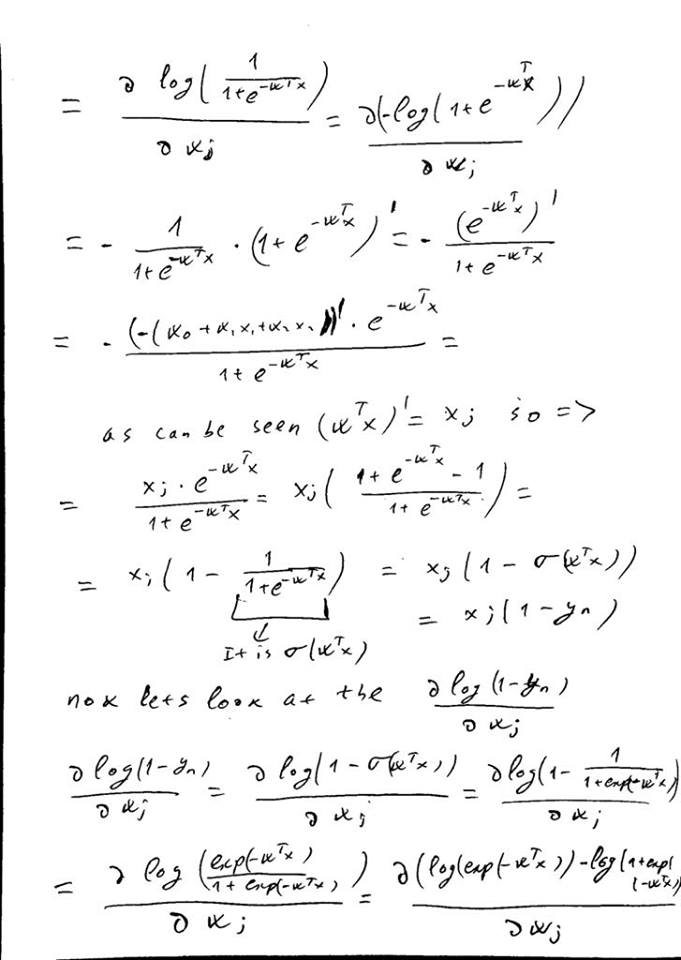

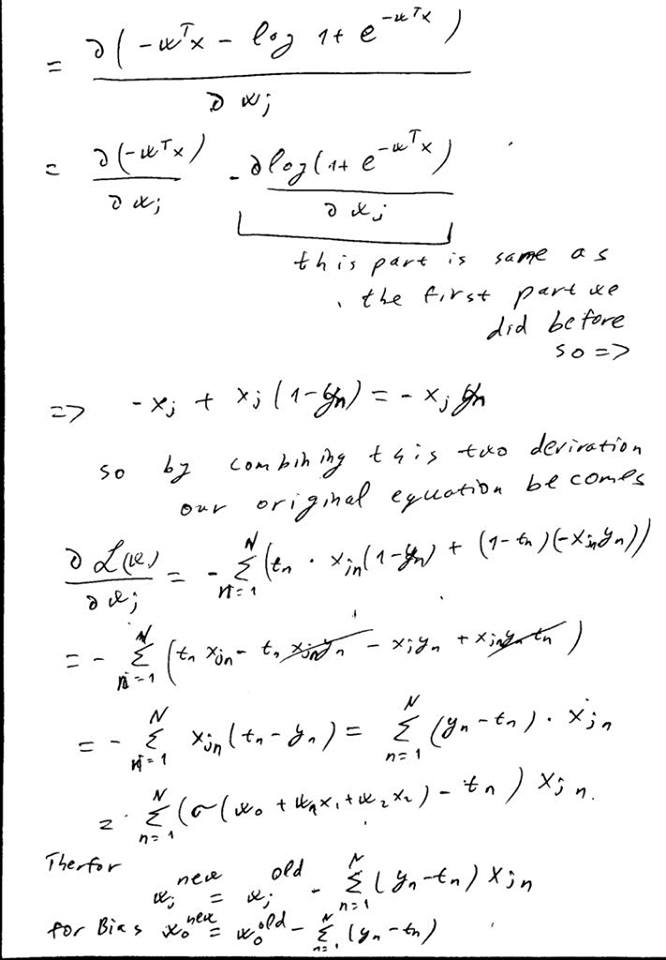

Decision Boundary and Weights are calculate down

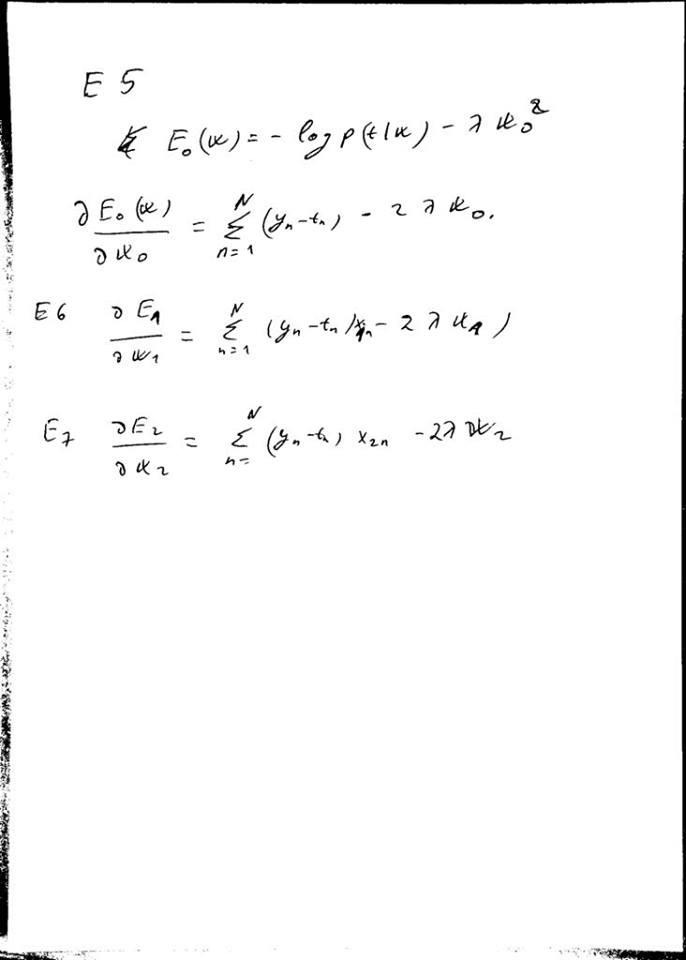

# Exercise 4

In [113]:
import numpy as np
import mpmath as mpmath
import math as math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

In [114]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'
  
def print_table(table):
    longest_cols = [
        (max([len(str(row[i])) for row in table]) + 3)
        for i in range(len(table[0]))
    ]
    row_format = "".join(["{:>" + str(longest_col) + "}" for longest_col in longest_cols])
    i = 0
    for row in table:
        if i == 0:
            print(color.BOLD + row_format.format(*row) + color.END)
            print('------------------------------------------------------------------------------------------------------------------')
        else:
            print(row_format.format(*row))
        i = i +1

In [562]:
def sigmoid(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg):
    
    logisitic_sigmoid = np.zeros(len(X1_Pos) + len(X1_Neg))
    
    for i in range(len(X1_Pos)):
        sigmoid = 1 / (1 + np.exp(-(w0 + w1 * X1_Pos[i] + w2 * X2_Pos[i])))
        logisitic_sigmoid[i] = sigmoid
        
    for i in range(len(X1_Neg)):
        sigmoid = 1 / (1 + np.exp(-(w0 + w1 * X1_Neg[i] + w2 * X2_Neg[i])))
        logisitic_sigmoid[len(X1_Pos) + i] = sigmoid
    
    return logisitic_sigmoid

In [563]:
def derivative_w0(w0, w1, w2, length_pos, length_neg, sigmoid):
    
    arr = sigmoid
    
    for i in range(length_pos):
        arr[i] = arr[i] - 1
        
    for i in range(length_neg):
        arr[length_pos + i] = arr[length_pos + i]
    
    return arr

def derivative_w1(w0, w1, w2, X1_Pos, X1_Neg, sigmoid):
    
    arr = sigmoid
    
    for i in range(len(X1_Pos)):
        arr[i] = arr[i] - 1
        arr[i] = arr[i] * X1_Pos[i]
        
    for i in range(len(X1_Neg)):
        arr[len(X1_Pos) + i] = arr[len(X1_Pos) + i]
        arr[len(X1_Pos) + i] = arr[len(X1_Pos) + i] * X1_Neg[i]
    
    return arr

def derivative_w2(w0, w1, w2, X2_Pos, X2_Neg, sigmoid):
    
    arr = sigmoid
    
    for i in range(len(X2_Pos)):
        arr[i] = arr[i] - 1
        arr[i] = arr[i] * X2_Pos[i]
        
    for i in range(len(X2_Neg)):
        arr[len(X2_Pos) + i] = arr[len(X2_Pos) + i]
        arr[len(X2_Pos) + i] = arr[len(X2_Pos) + i] * X2_Neg[i]
    
    return arr

def cost_function(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg):
    
    cost = np.zeros(len(X1_Pos) + len(X1_Neg))
    
    for i in range(len(X1_Pos)):
        sigmoid = 1 / (1 + np.exp(-(w0 + w1 * X1_Pos[i] + w2 * X2_Pos[i])))
        cost[i] = np.log(sigmoid)
        
    for i in range(len(X1_Neg)):
        sigmoid = 1 - 1 / (1 + np.exp(-(w0 + w1 * X1_Neg[i] + w2 * X2_Neg[i])))
        cost[len(X1_Pos) + i] = np.log(sigmoid)
        
    return -1 * np.sum(cost)  / (len(X1_Pos) + len(X1_Neg))

In [564]:
def descent(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg):
        
    weights = []
    negative_likelihood_values = []
    negative_likelihood_values.append(cost_function(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg))
    weights.append([w0, w1, w2])
    
    i = 0
    
    while(i < 1000):
        i = i + 1        
        
        logisitic_sigmoid = sigmoid(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg)

        der_w0 = derivative_w0(w0, w1, w2, len(X1_Pos), len(X1_Neg), logisitic_sigmoid.copy())

        der_w1 = derivative_w1(w0, w1, w2, X1_Pos, X1_Neg, logisitic_sigmoid.copy())

        der_w2 = derivative_w2(w0, w1, w2, X2_Pos, X2_Neg, logisitic_sigmoid.copy())
                
        w0 = w0 - np.sum(der_w0)
        w1 = w1 - np.sum(der_w1)
        w2 = w2 - np.sum(der_w2)
        
        negative_likelihood_value_new = cost_function(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg)
                      
        weights.append([w0, w1, w2])
        negative_likelihood_values.append(negative_likelihood_value_new)
                
        
    return weights, negative_likelihood_values


In [565]:
#Positive Data
X1_Pos, X2_Pos = np.array([3, 3, 2, 3, 4, 4]), np.array([1, 5, 6, 6, 6, 7])

#Negative Data
X1_Neg, X2_Neg = np.array([6, 7, 8, 6, 7, 8, 6]), np.array([2, 2, 2, 3, 3, 3, 5])


1000
initial weights:  0.0 0.0 0.6
chosen weights:  [47.02907383431463, -16.069299279286035, 8.2776731560619]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


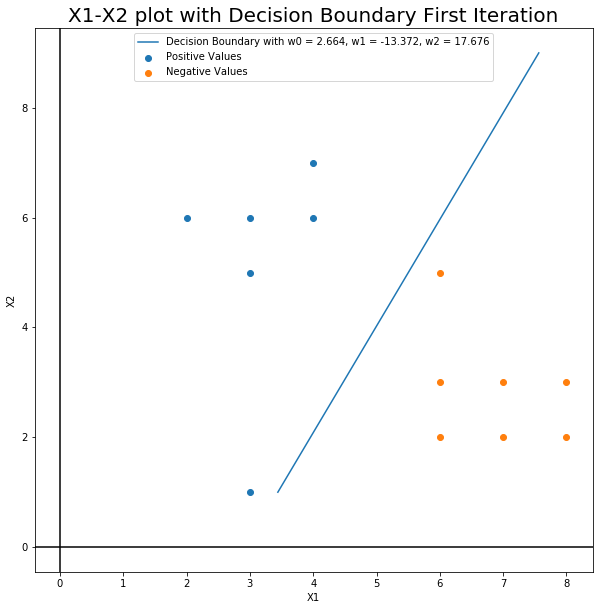

In [573]:
w0, w1, w2 = random.randint(-10,10)/10, random.randint(-10,10)/10, random.randint(-10,10)/10

weights, negative_likelihood_values = descent(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg)

print(np.argmin(negative_likelihood_values))
print('initial weights: ',w0, w1, w2)
print('chosen weights: ',weights[np.argmin(negative_likelihood_values)])

plt.figure(figsize=(10, 10))

x2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
x1 = - ( weights[np.argmin(negative_likelihood_values)][0] 
        + weights[np.argmin(negative_likelihood_values)][2] * x2) / weights[np.argmin(negative_likelihood_values)][1]

plt.scatter(X1_Pos, X2_Pos, label = 'Positive Values')
plt.scatter(X1_Neg, X2_Neg, label = 'Negative Values')

plt.plot(x1, x2, label = 'Decision Boundary with w0 = {}, w1 = {}, w2 = {}'
         .format(round(weights[i][0], 3), round(weights[i][1], 3), round(weights[i][2], 3)))

plt.title(r'X1-X2 plot with Decision Boundary First Iteration', fontsize = '20')
plt.xlabel(r'X1')
plt.ylabel(r'X2')   

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')
plt.show()

In [574]:
table = [
    ["", "Condition positive ", "Condition negative "],
    ["Predicted condition positive", 6, 0],
    ["Predicted condition negative", 0, 7]
]
print_table(table)

                                  Condition positive    Condition negative 
------------------------------------------------------------------------------------------------------------------
   Predicted condition positive                     6                     0
   Predicted condition negative                     0                     7


True Positive  - 6 
False Positive - 0
True Negative  - 7
False Negative - 0

As can be seen from the result, the decision boundary has 100 percent accuracy in classification. 

# Exercise 5

In [1115]:
def descent_w0_regularized(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg, lambda_val):
    
    weights = []
    negative_likelihood_values = []
    negative_likelihood_values.append(cost_function(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg))
    weights.append([w0, w1, w2])
    
    i = 0
    
    while(i < 1000):
        i = i + 1   
        
        logisitic_sigmoid = sigmoid(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg)

        der_w0 = derivative_w0(w0, w1, w2, len(X1_Pos), len(X1_Neg), logisitic_sigmoid.copy())

        der_w1 = derivative_w1(w0, w1, w2, X1_Pos, X1_Neg, logisitic_sigmoid.copy())

        der_w2 = derivative_w2(w0, w1, w2, X2_Pos, X2_Neg, logisitic_sigmoid.copy())
                
        w0 = w0 - np.sum(der_w0) - lambda_val * 2 * w0
        w1 = w1 - np.sum(der_w1)
        w2 = w2 - np.sum(der_w2)
        
        negative_likelihood_value_new = cost_function(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg) - lambda_val * w0 * w0
                        
        weights.append([w0, w1, w2])        
        negative_likelihood_values.append(negative_likelihood_value_new)
        
        
    return weights, negative_likelihood_values


In [1116]:
r_w0, r_w1, r_w2 = random.randint(-10,10)/10, random.randint(-10,10)/10, random.randint(-10,10)/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


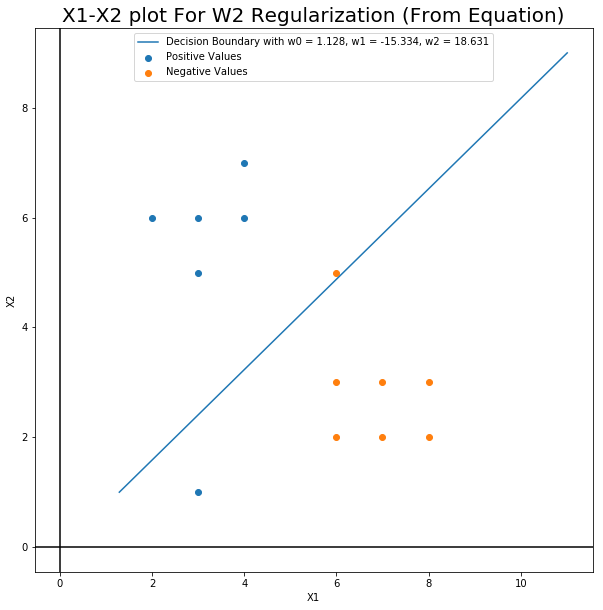

In [1117]:
lambda_value = 0.8
w0, w1, w2 = r_w0 * 1, r_w1 * 1, r_w2 * 1

weights, negative_likelihood_values = descent_w0_regularized(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg, lambda_value)

plt.figure(figsize=(10, 10))

x2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
x1 = - ( weights[1000][0] + 
        weights[1000][2] * x2) / weights[1000][1]

plt.scatter(X1_Pos, X2_Pos, label = 'Positive Values')
plt.scatter(X1_Neg, X2_Neg, label = 'Negative Values')

plt.plot(x1, x2, label = 'Decision Boundary with w0 = {}, w1 = {}, w2 = {}'
         .format(round(weights[1000][0], 3), 
                 round(weights[1000][1], 3), 
                 round(weights[1000][2], 3)))

plt.title(r'X1-X2 plot For W2 Regularization (From Equation)', fontsize = '20')
plt.xlabel(r'X1')
plt.ylabel(r'X2')   

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')
plt.show()

In [838]:
table = [
    ["", "Condition positive ", "Condition negative "],
    ["Predicted condition positive", 5, 1],
    ["Predicted condition negative", 1, 6]
]
print_table(table)

                                  Condition positive    Condition negative 
------------------------------------------------------------------------------------------------------------------
   Predicted condition positive                     5                     1
   Predicted condition negative                     1                     6


As can be seen above, when the w0 is reguralized and when it is close to zero, the bottom blue point cannot be correctly classified because the decision boundary will always cross the 0,0 line when it reaches to 0. The most top yellow can or cannot be classified correctly depending on the initial weights

# Exercise 6

In [1105]:
def descent_w1_regularized(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg, lambda_val):
    
    weights = []
    negative_likelihood_values = []
    negative_likelihood_values.append(cost_function(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg))
    weights.append([w0, w1, w2])
    
    i = 0
    
    while(i < 10000):
        i = i + 1   
        
        logisitic_sigmoid = sigmoid(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg)

        der_w0 = derivative_w0(w0, w1, w2, len(X1_Pos), len(X1_Neg), logisitic_sigmoid.copy())

        der_w1 = derivative_w1(w0, w1, w2, X1_Pos, X1_Neg, logisitic_sigmoid.copy())

        der_w2 = derivative_w2(w0, w1, w2, X2_Pos, X2_Neg, logisitic_sigmoid.copy())
                
        w0 = w0 - np.sum(der_w0)
        w1 = w1 - np.sum(der_w1) - lambda_val * 2 * w1
        w2 = w2 - np.sum(der_w2)
        
        negative_likelihood_value_new = cost_function(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg) - lambda_val * w1 * w1
                        
        weights.append([w0, w1, w2])        
        negative_likelihood_values.append(negative_likelihood_value_new)
        
        
    return weights, negative_likelihood_values


In [1110]:
r_w0, r_w1, r_w2 = random.randint(-10,10)/10, random.randint(-10,10)/10, random.randint(-10,10)/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


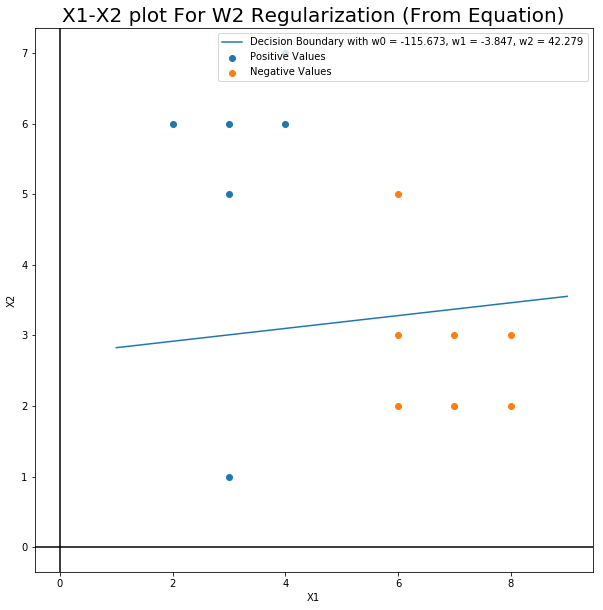

In [1111]:
lambda_value = 0.36
w0, w1, w2 = r_w0 * 1, r_w1 * 1, r_w2 * 1

weights, negative_likelihood_values = descent_w1_regularized(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg, lambda_value)

plt.figure(figsize=(10, 10))

x1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
x2 = - ( weights[10000][0] + 
        weights[10000][1] * x1) / weights[10000][2]

plt.scatter(X1_Pos, X2_Pos, label = 'Positive Values')
plt.scatter(X1_Neg, X2_Neg, label = 'Negative Values')

plt.plot(x1, x2, label = 'Decision Boundary with w0 = {}, w1 = {}, w2 = {}'
         .format(round(weights[10000][0], 3), 
                 round(weights[10000][1], 3), 
                 round(weights[10000][2], 3)))

plt.title(r'X1-X2 plot For W2 Regularization (From Equation)', fontsize = '20')
plt.xlabel(r'X1')
plt.ylabel(r'X2')   

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')
plt.show()

As can bee seen when w1 is close to zero and w1 << w2 and w1 << w0, we will see more likely horizontal line parallel to X1.

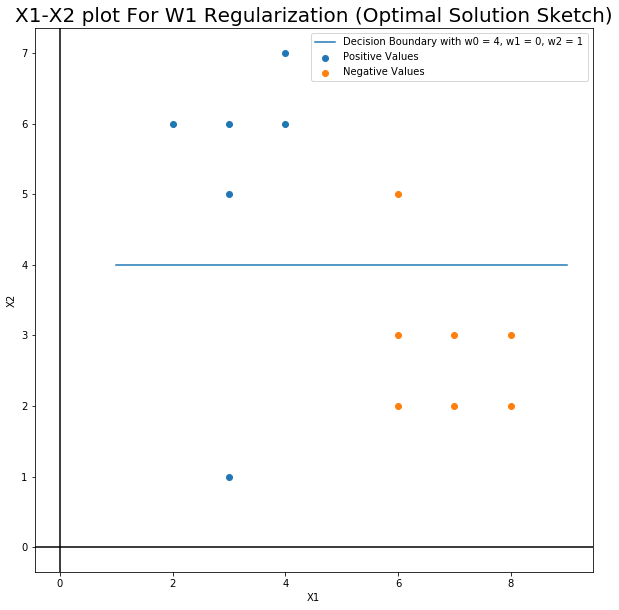

In [1104]:
plt.figure(figsize=(10, 10))

x1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
x2 = ( 4 + 0 * x1) / 1

plt.scatter(X1_Pos, X2_Pos, label = 'Positive Values')
plt.scatter(X1_Neg, X2_Neg, label = 'Negative Values')

plt.plot(x1, x2, label = 'Decision Boundary with w0 = {}, w1 = {}, w2 = {}'.format(4, 0, 1))

plt.title(r'X1-X2 plot For W1 Regularization (Optimal Solution Sketch)', fontsize = '20')
plt.xlabel(r'X1')
plt.ylabel(r'X2')   

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')
plt.show()

In [904]:
table = [
    ["", "Condition positive ", "Condition negative "],
    ["Predicted condition positive", 5, 1],
    ["Predicted condition negative", 1, 6]
]
print_table(table)

                                  Condition positive    Condition negative 
------------------------------------------------------------------------------------------------------------------
   Predicted condition positive                     5                     1
   Predicted condition negative                     1                     6


Following the same logic, When the W1 value goes close to zero X1 line will not be considered and the decision boundary will be a parallel line to X1. Therefore the most succesfull decision boundary will be same as shown above and there is no way to successfully classify bottom blue point and upper yellow point.

# Exercise 7

In [1099]:
def descent_w2_regularized(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg, lambda_val):
    
    weights = []
    negative_likelihood_values = []
    negative_likelihood_values.append(cost_function(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg))
    weights.append([w0, w1, w2])
    
    i = 0
    
    while(i < 10000):
        i = i + 1   
        
        logisitic_sigmoid = sigmoid(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg)

        der_w0 = derivative_w0(w0, w1, w2, len(X1_Pos), len(X1_Neg), logisitic_sigmoid.copy())

        der_w1 = derivative_w1(w0, w1, w2, X1_Pos, X1_Neg, logisitic_sigmoid.copy())

        der_w2 = derivative_w2(w0, w1, w2, X2_Pos, X2_Neg, logisitic_sigmoid.copy())
                
        w0 = w0 - np.sum(der_w0)
        w1 = w1 - np.sum(der_w1)
        w2 = w2 - np.sum(der_w2) - lambda_val * 2 * w2
        
        negative_likelihood_value_new = cost_function(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg) - lambda_val * w2 * w2
                        
        weights.append([w0, w1, w2])        
        negative_likelihood_values.append(negative_likelihood_value_new)
        
        
    return weights, negative_likelihood_values


In [1100]:
r_w0, r_w1, r_w2 = random.randint(-10,10)/10, random.randint(-10,10)/10, random.randint(-10,10)/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


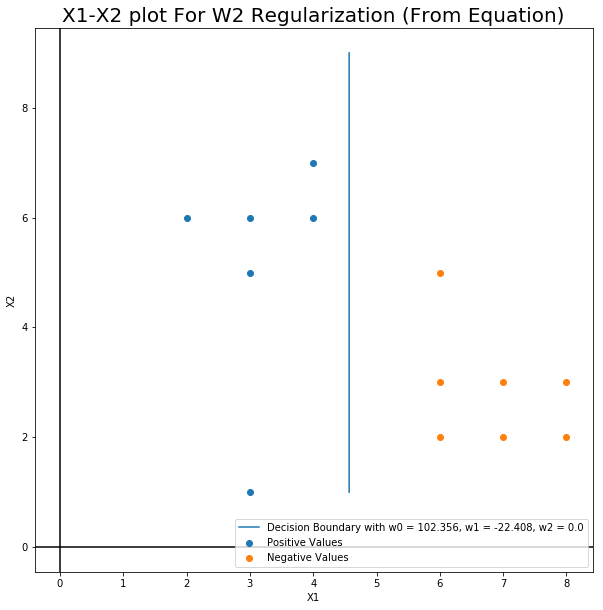

In [1102]:
lambda_value = 0.36
w0, w1, w2 = r_w0 * 1, r_w1 * 1, r_w2 * 1

weights, negative_likelihood_values = descent_w2_regularized(w0, w1, w2, X1_Pos, X2_Pos, X1_Neg, X2_Neg, lambda_value)

plt.figure(figsize=(10, 10))

x2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
x1 = - ( weights[10000][0] + 
        weights[10000][2] * x2) / weights[10000][1]

plt.scatter(X1_Pos, X2_Pos, label = 'Positive Values')
plt.scatter(X1_Neg, X2_Neg, label = 'Negative Values')

plt.plot(x1, x2, label = 'Decision Boundary with w0 = {}, w1 = {}, w2 = {}'
         .format(round(weights[10000][0], 3), 
                 round(weights[10000][1], 3), 
                 round(weights[10000][2], 3)))

plt.title(r'X1-X2 plot For W2 Regularization (From Equation)', fontsize = '20')
plt.xlabel(r'X1')
plt.ylabel(r'X2')   

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')
plt.show()

As can bee seen when w1 is close to zero and w1 << w2 and w1 << w0, we will see more likely horizontal line parallel to X1.

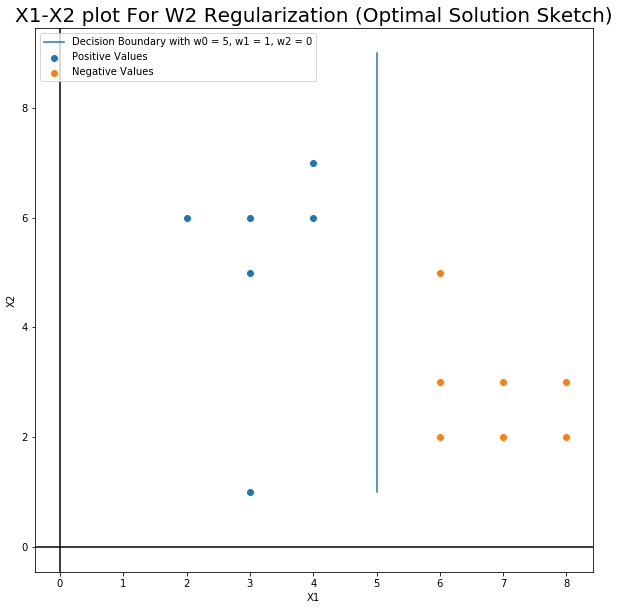

In [1103]:
plt.figure(figsize=(10, 10))

x2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
x1 = ( 5 + 0 * x2) / 1

plt.scatter(X1_Pos, X2_Pos, label = 'Positive Values')
plt.scatter(X1_Neg, X2_Neg, label = 'Negative Values')

plt.plot(x1, x2, label = 'Decision Boundary with w0 = {}, w1 = {}, w2 = {}'.format(5, 1, 0))

plt.title(r'X1-X2 plot For W2 Regularization (Optimal Solution Sketch)', fontsize = '20')
plt.xlabel(r'X1')
plt.ylabel(r'X2')   

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')
plt.show()

In [981]:
table = [
    ["", "Condition positive ", "Condition negative "],
    ["Predicted condition positive", 6, 0],
    ["Predicted condition negative", 0, 7]
]
print_table(table)

                                  Condition positive    Condition negative 
------------------------------------------------------------------------------------------------------------------
   Predicted condition positive                     6                     0
   Predicted condition negative                     0                     7


As for the case where W2 is 0, we dont consider X2 line and the optimal decision boundary would be a vertical line between blue and yellow points as show in the above graph.

# Exercise 8

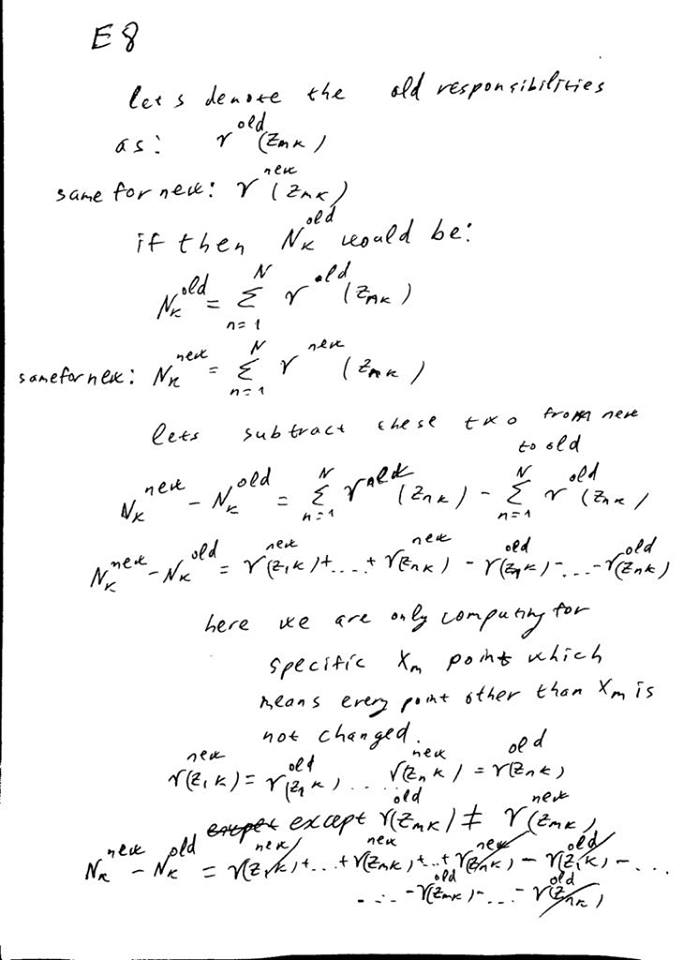

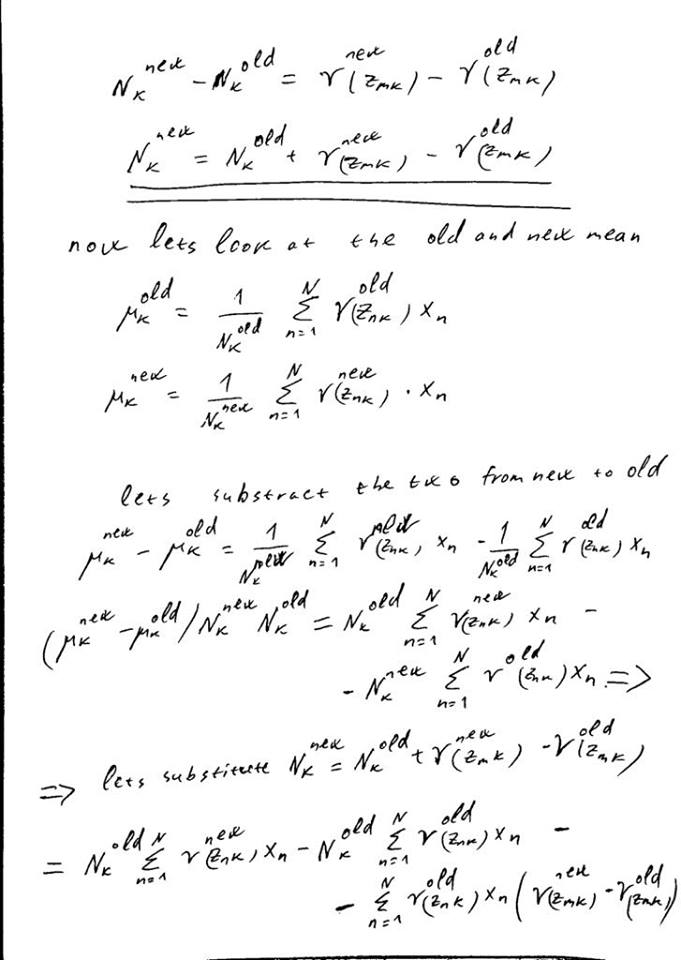

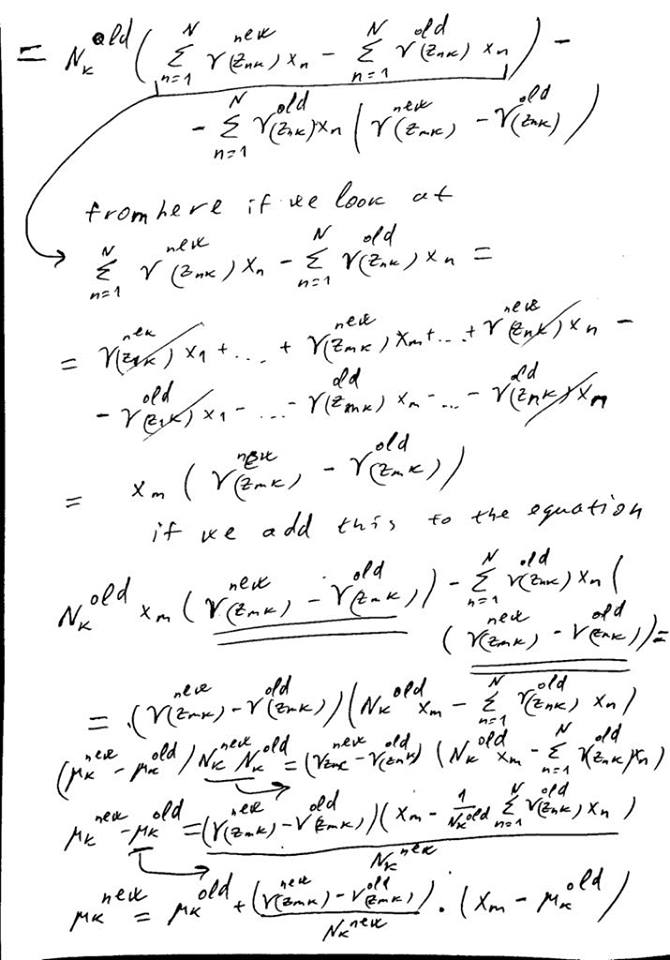